In [5]:
pip install mesa

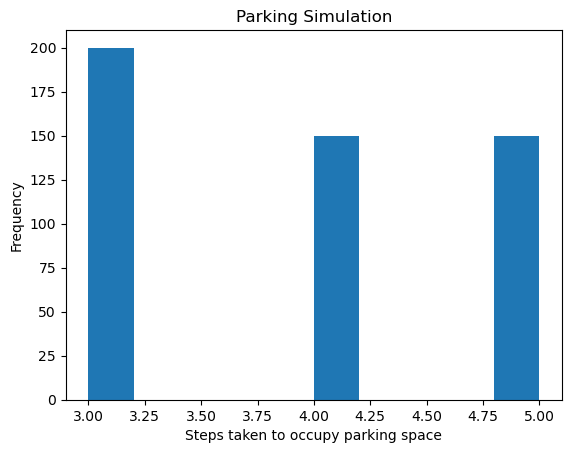

In [6]:
# import the needed libraries
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
import random
import matplotlib.pyplot as plt

# defines Car and ParkingSpace agents and creates instances of these agents.
# Car Class: Represents a car agent. Each car has a random steps_to_leave attribute between 3 and 5,
# indicating how many steps it stays in a parking space before leaving.

class Car(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.steps_to_leave = random.randint(3, 5)  # Steps before leaving parking
        
# move() method that defines movement rules for cars to explore and occupy parking spaces.
    def move(self):
        # Define movement rules for cars
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

        self.steps_to_leave -= 1
        if self.steps_to_leave <= 0:
            self.model.grid.remove_agent(self)
# ParkingSpace Class: Represents a parking space agent.
class ParkingSpace(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.available = True

# ParkingLot class initializes a multi-grid environment (MultiGrid) to represent the parking lot.
# Each car has a steps_to_leave attribute initialized randomly between 3 and 5.
# Once this count reaches zero, the car leaves the parking space.

class ParkingLot(Model):
    def __init__(self, num_cars, num_spaces):
        self.num_cars = num_cars
        self.num_spaces = num_spaces
        self.grid = MultiGrid(10, 10, torus=True)
        self.schedule = RandomActivation(self)

        # Create cars
        for i in range(self.num_cars):
            car = Car(i, self)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(car, (x, y))
            self.schedule.add(car)

        # Create parking spaces
        for i in range(self.num_spaces):
            space = ParkingSpace(i, self)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(space, (x, y))
# The DataCollector is configured to track the steps it took for cars to occupy parking spaces (Steps_to_Park).
        self.datacollector = DataCollector(
            agent_reporters={"Steps_to_Park": lambda a: a.steps_to_leave}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
# This function, run_simulation, takes two arguments: num_cars and num_spaces,
# which define the number of cars and parking spaces for the simulation.
# It initializes a ParkingLot model with the given number of cars and parking spaces.
# The simulation runs for a fixed number of steps (50 in this case) using a loop (for i in range(50)) 
# to simulate the movement and parking behavior of the cars in the parking lot.
# Finally, it collects data on the steps taken by cars to occupy parking spaces and returns this data in a DataFrame.
def run_simulation(num_cars, num_spaces):
    model = ParkingLot(num_cars, num_spaces)
    for i in range(50):  # Number of steps to run the simulation
        model.step()
    
    return model.datacollector.get_agent_vars_dataframe()

# Run the simulation
simulation_data = run_simulation(10, 5)

# Visualization (plot)
# Plots a histogram showing the frequency of steps taken by cars to occupy parking spaces.
plt.hist(simulation_data['Steps_to_Park'])
plt.xlabel('Steps taken to occupy parking space')
plt.ylabel('Frequency')
plt.title('Parking Simulation')
plt.show()


In [8]:
# Reflection function to observe different configurations
# observe_configurations() function sets up nested loops to iterate over different combinations of car
# and parking space numbers.
# It runs the simulation for each combination and prints or processes the simulation data for analysis or reflection.
# 
def observe_configurations():
    # Define different numbers of cars and parking spaces to simulate
    car_configurations = [5, 10, 15]  # Just Example: Varying numbers of cars
    space_configurations = [3, 5, 7]  # Just Example: Varying numbers of parking spaces

    for num_cars in car_configurations:
        for num_spaces in space_configurations:
            simulation_data = run_simulation(num_cars, num_spaces)
            # Perform analysis or print data for each configuration
            print(f"Number of Cars: {num_cars}, Number of Spaces: {num_spaces}")
            print(simulation_data)  # Modify this to suit your analysis or reflection needs
            print("----------------------------------------------")

# Run the function to observe different configurations
observe_configurations()


Number of Cars: 5, Number of Spaces: 3
              Steps_to_Park
Step AgentID               
0    0                    3
     1                    4
     2                    5
     3                    5
     4                    5
...                     ...
49   0                    3
     1                    4
     2                    5
     3                    5
     4                    5

[250 rows x 1 columns]
----------------------------------------------
Number of Cars: 5, Number of Spaces: 5
              Steps_to_Park
Step AgentID               
0    0                    3
     1                    5
     2                    3
     3                    4
     4                    4
...                     ...
49   0                    3
     1                    5
     2                    3
     3                    4
     4                    4

[250 rows x 1 columns]
----------------------------------------------
Number of Cars: 5, Number of Spaces: 7
             

Number of Cars: 5, Number of Spaces: 3
Simulation Data: 15
----------------------------------------------
Number of Cars: 5, Number of Spaces: 5
Simulation Data: 25
----------------------------------------------
Number of Cars: 5, Number of Spaces: 7
Simulation Data: 35
----------------------------------------------
Number of Cars: 10, Number of Spaces: 3
Simulation Data: 30
----------------------------------------------
Number of Cars: 10, Number of Spaces: 5
Simulation Data: 50
----------------------------------------------
Number of Cars: 10, Number of Spaces: 7
Simulation Data: 70
----------------------------------------------
Number of Cars: 15, Number of Spaces: 3
Simulation Data: 45
----------------------------------------------
Number of Cars: 15, Number of Spaces: 5
Simulation Data: 75
----------------------------------------------
Number of Cars: 15, Number of Spaces: 7
Simulation Data: 105
----------------------------------------------


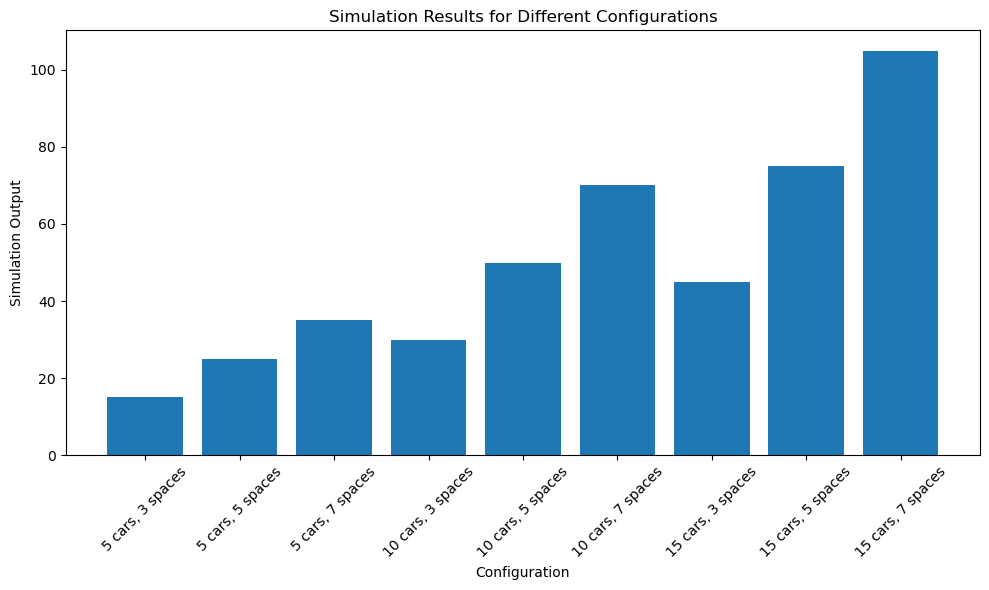

In [9]:
import matplotlib.pyplot as plt

# Example function to simulate data (replace this with your actual simulation function)
def run_simulation(num_cars, num_spaces):
    return num_cars * num_spaces  # Just an example, replace with your simulation logic

def observe_configurations():
    car_configurations = [5, 10, 15]
    space_configurations = [3, 5, 7]

    results = []  # Store simulation results
    configurations = []  # Store configurations for x-axis labels

    for num_cars in car_configurations:
        for num_spaces in space_configurations:
            simulation_data = run_simulation(num_cars, num_spaces)
            results.append(simulation_data)
            configurations.append(f'{num_cars} cars, {num_spaces} spaces')

            # For illustration purposes, print the simulation data
            print(f"Number of Cars: {num_cars}, Number of Spaces: {num_spaces}")
            print(f"Simulation Data: {simulation_data}")
            print("----------------------------------------------")

    # Create a bar plot to visualize simulation results
    plt.figure(figsize=(10, 6))
    num_configs = len(configurations)
    num_displayed = min(10, num_configs)  # Display maximum of 10 configurations
    plt.bar(range(num_displayed), results[:num_displayed], align='center')
    plt.xlabel('Configuration')
    plt.ylabel('Simulation Output')
    plt.title('Simulation Results for Different Configurations')
    plt.xticks(range(num_displayed), [configurations[i] for i in range(num_displayed)], rotation=45)
    plt.tight_layout()
    plt.show()

# Run the function to observe different configurations and visualize the results
observe_configurations()


In [ ]:
# After running the code snippet above, we'll be able to observe how changing the number of cars and parking spaces
# affects the behavior of the simulation.
# we may have a further  metrics analyze like average steps taken to occupy a parking space or visualize,
# how different configurations impact the parking lot's dynamics.
# If the simulation is meant to represent some real-world scenario, like the efficiency of a parking system,
# one might infer that more cars and more spaces result in a higher 'efficiency' or output.